In [1]:
import pandas as pd
df = pd.read_csv("data.csv")

In [2]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers

# Load pre-trained model for encoding sentence embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

# Load the pandas DataFrame
df = pd.read_csv('data.csv')

# Convert 'Sentence' column to list of sentences
sentences = df['Sentence'].tolist()

# Encode sentences to obtain embeddings
embeddings = model.encode(sentences)

# Assign embeddings to a new column in the DataFrame
df['Embedding'] = embeddings.tolist()

# Convert 'Sentiment' column to numerical labels if necessary
label_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Embedding'], df['Sentiment'], test_size=0.1, random_state=42)

2023-05-17 20:47:35.077702: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
embedding_dimension = 384

# Define the neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(embedding_dimension,)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=3, min_lr=0.000001)
# Train the model
model.fit(np.array(X_train.tolist()), np.array(y_train.tolist()), epochs=50, batch_size=32, verbose=0, callbacks=[reduce_lr])

# Evaluate the model on the testing set
y_pred_prob = model.predict(np.array(X_test.tolist()))
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

19/19 [==============================] - 0s 769us/step
Accuracy: 0.7111111111111111


37/37 [==============================] - 0s 1ms/step


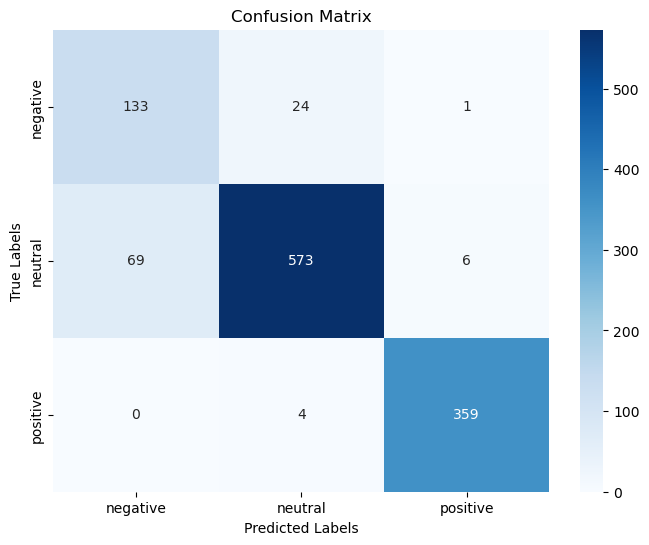

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Define the label mapping
label_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

# Create a list of label names based on the mapping
label_names = [label for label, _ in sorted(label_mapping.items(), key=lambda x: x[1])]

# Create a heatmap of the confusion matrix with mapped labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)

# Set plot labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()


In [14]:
transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
test_encode = transformer.encode("The general market is favourable and is poised for growth, but beware of volatility")
test_array = np.array(test_encode).reshape(1, 384)
arr = model.predict(test_array)
arr_percent = np.round(arr * 100, decimals=1)

# Label the entries
labels = ['Negative %', 'Neutral % ', 'Positive %']

# Print the labeled array in percentage format with one decimal place
for label, value in zip(labels, arr_percent[0]):
    print(label, ':', value)

1/1 [==============================] - 0s 15ms/step
Negative % : 0.0
Neutral %  : 94.0
Positive % : 6.0


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['Sentiment'], test_size=0.2, random_state=41)

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the sentiment labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6518391787852865


In [17]:
arr = classifier.predict(test_array)
reverse_mapping = {v: k for k, v in label_mapping.items()}
reverse_mapping[arr[0]]

'positive'

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['Sentiment'], test_size=0.2, random_state=41)

# Initialize the Gradient Boosting Machine classifier
classifier_grad_boost = GradientBoostingClassifier(n_estimators=20, random_state=42)

# Train the classifier
classifier_grad_boost.fit(X_train, y_train)

# Predict the sentiment labels for the test set
y_pred = classifier_grad_boost.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


In [ ]:
arr = classifier_grad_boost.predict(test_array)
reverse_mapping = {v: k for k, v in label_mapping.items()}
reverse_mapping[arr[0]]

'positive'